checking for rough consistency with fig.11 of 2103.01964 and fig. 5 of 2206.15377

In [1]:
from LIMxCMBL.init import *


In [2]:
kmin, kmax, nk = 1e-4, 1e2, 128
k = np.logspace(np.log10(kmin), np.log10(kmax), nk)
pk_lin = ccl.linear_matter_power(cosmo, k, 1)

In [3]:
import matplotlib.pyplot as plt

In [4]:
from LIMxCMBL.kernels import *
from LIMxCMBL.experiments import *

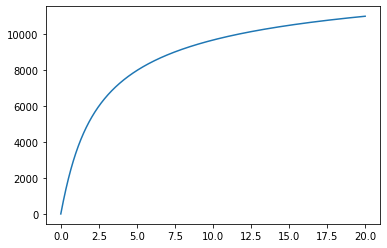

In [5]:
plt.plot(zs, chis)

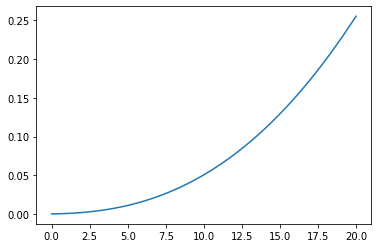

In [6]:
dchi_dz = np.gradient(chis, zs)
dz_dchi = 1.0 / dchi_dz

plt.plot(zs, (1+zs)*dz_dchi)

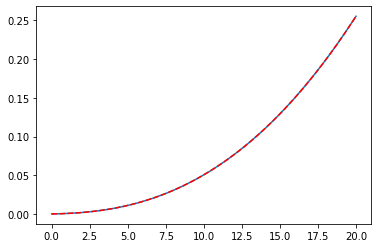

In [7]:
f_dz_dchi = interp1d(zs, dz_dchi, kind='linear')
plt.plot(zs, (1+zs)*f_dz_dchi(zs))
plt.plot(zs, (1+zs)*dz_dchi, 'r--')

# CCAT Prime

In [8]:
zmin = 3.5
zmax = 8.1
idxs = np.where((zs < zmax) & (zs>zmin))[0]

In [9]:
R = 100
chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))
(chimax - chimin) / ((1+zmax) * R * f_dz_dchi(zmax))

700.8130816142079

In [10]:
_a, _b = CCAT_prime_Pei() #[(kJy/sr)^2 Mpc^3]

_a = _a.to((u.Jy/u.sr)**2 * u.Mpc**3) * h**3 #[(Jy/sr)^2 Mpc/h^3]
_b = _b.to((u.Jy/u.sr)**2 * u.Mpc**3) * h**3 #[(Jy/sr)^2 Mpc/h^3]

(100000.0, 30000000000.0)

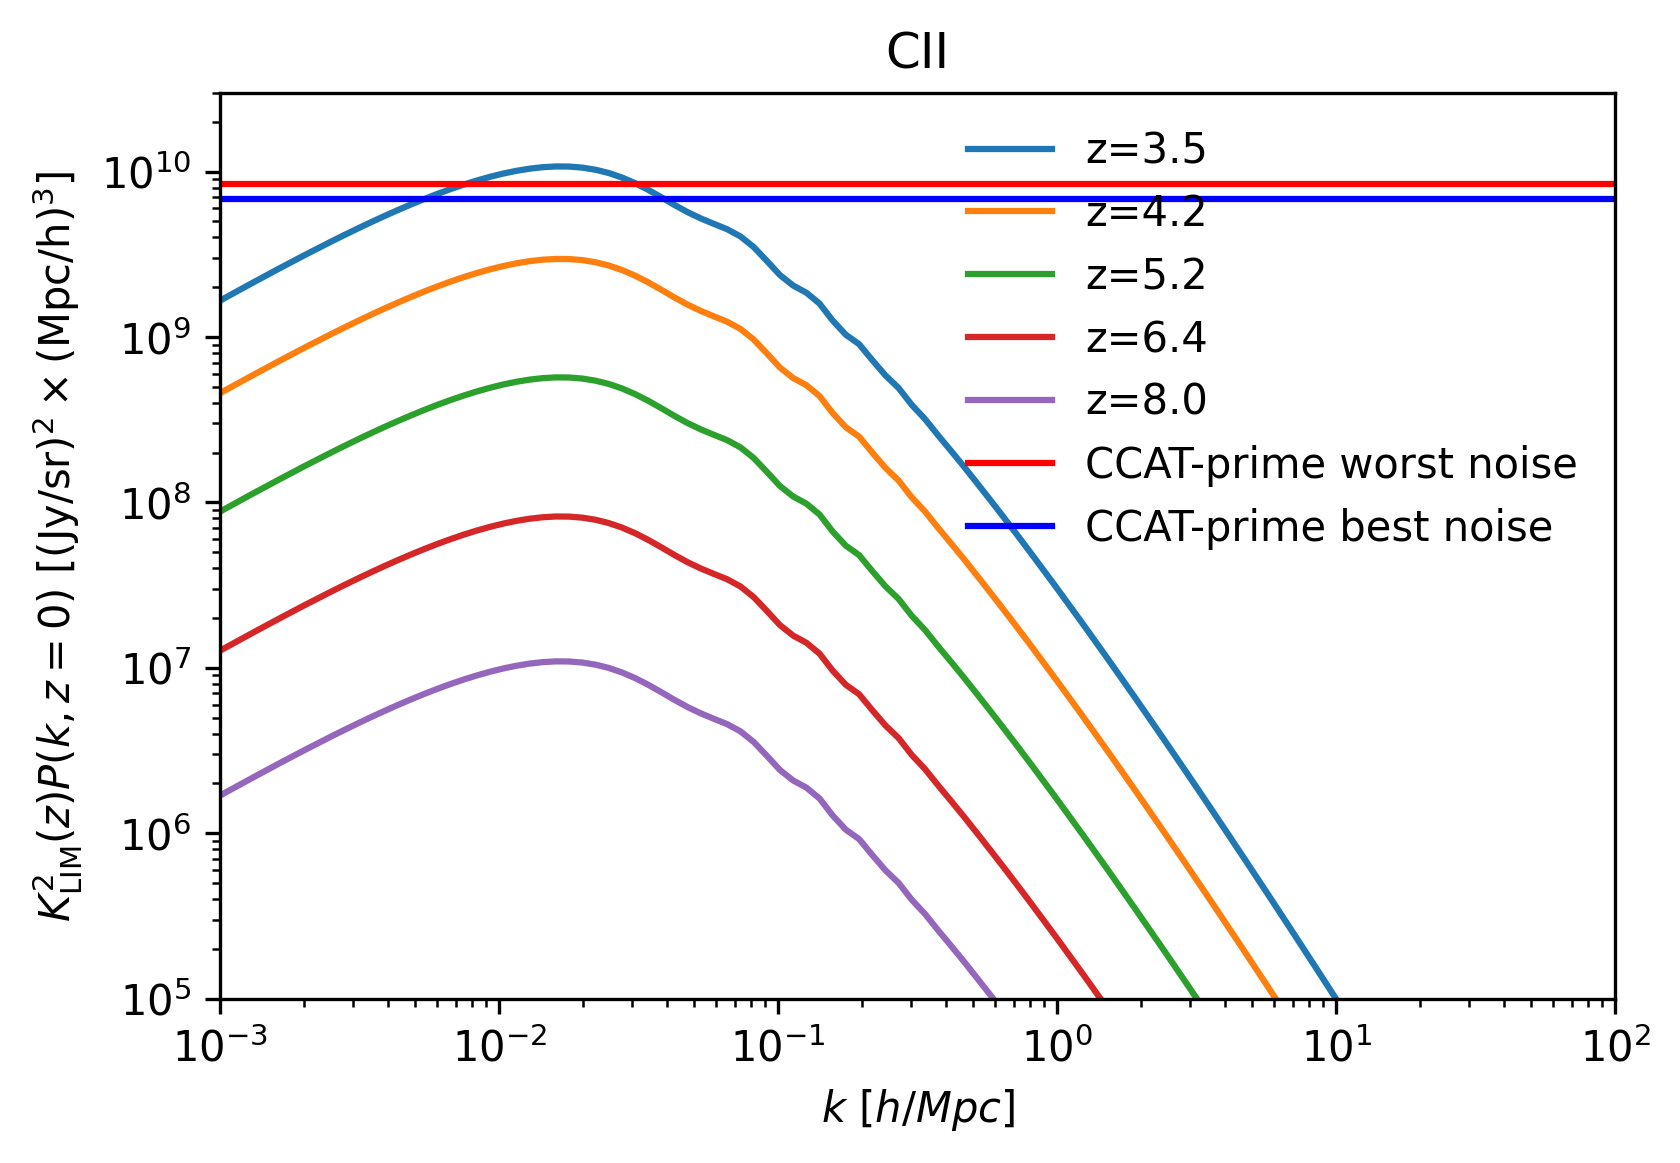

In [11]:
plt.figure(dpi = 300, facecolor='w')

for idx in idxs[::500]:
    z = zs[idx]
    plt.plot(k/h, (KI[idx].to(u.Jy/u.sr))**2 * pk_lin * h **3, label='z=%.1f'%(z))
    
    
plt.axhline(np.array(_a), c='r', label='CCAT-prime worst noise')
plt.axhline(np.array(_b), c='b', label='CCAT-prime best noise')

plt.xlim(1e-3, 1e2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$k\ [h / Mpc]$', )
plt.ylabel(r'$K_{\rm LIM}^2(z)P(k, z=0)\ [{\rm (Jy/sr)^2\times (Mpc/h)}^3]$', )
plt.legend(frameon=False)
plt.title('CII')
plt.ylim(1e5, 3e10)

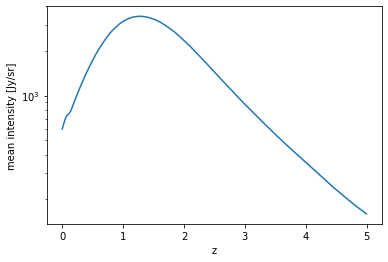

In [12]:
plt.plot(zs[np.where(zs < 5)], 
         (Lz * Hzbit).to(u.Jy/u.sr)[np.where(zs < 5)])
plt.ylabel('mean intensity [Jy/sr]')
plt.xlabel('z')
plt.yscale('log')

# COMAP

adapted from https://github.com/EmmanuelSchaan/HaloGen/blob/LIM/lim_specs.py

In [13]:
zmin = 2.4
zmax = 3.4
idxs = np.where((zs < zmax) & (zs>zmin))[0]

In [14]:
R = 800
chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))
(chimax - chimin) / ((1+zmax) * R * f_dz_dchi(zmax))

246.647670622564

In [15]:
_a, _b = COMAP_Pei()

_a = _a.to((u.Jy/u.sr)**2 * u.Mpc**3) * h**3 #[(Jy/sr)^2 Mpc/h^3]
_b = _b.to((u.Jy/u.sr)**2 * u.Mpc**3) * h**3 #[(Jy/sr)^2 Mpc/h^3]

(1000000.0, 300000000.0)

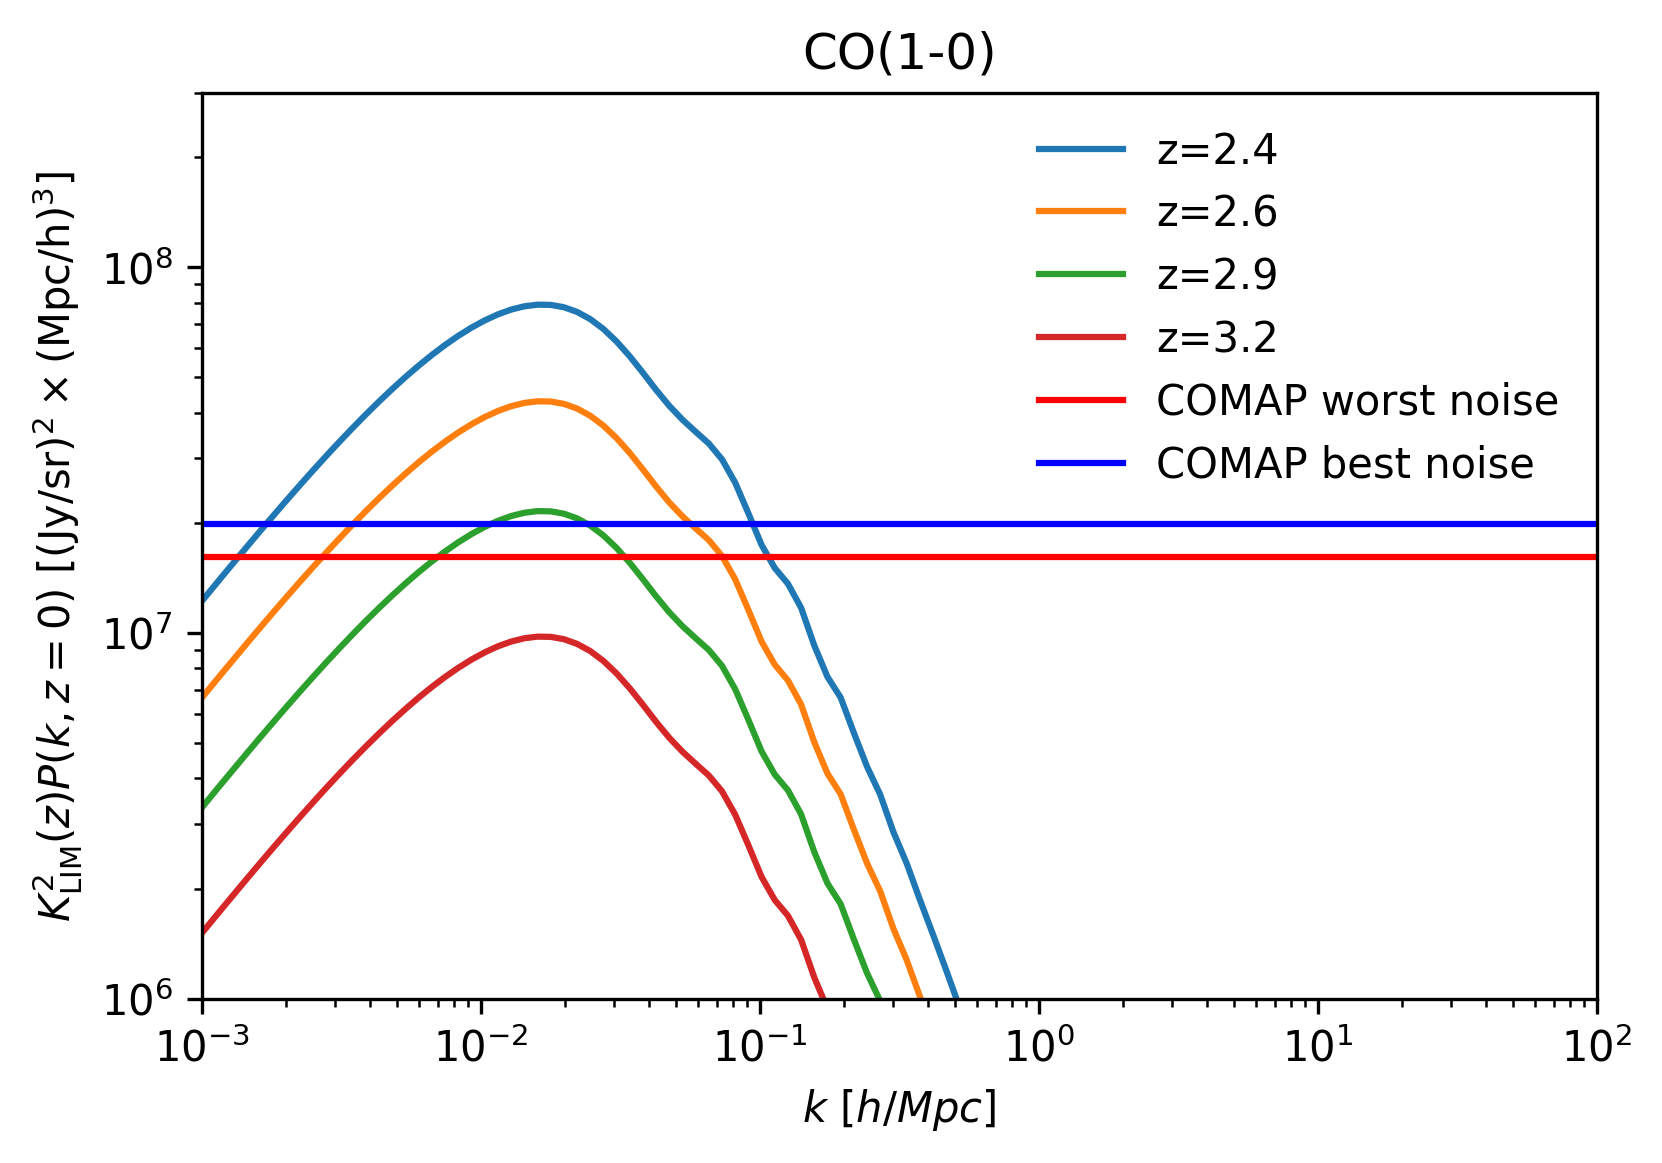

In [16]:
plt.figure(dpi = 300, facecolor='w')

for idx in idxs[::250]:
    z = zs[idx]
    plt.plot(k/h, (KI_CO[idx].to(u.Jy/u.sr))**2 * pk_lin * h **3, label='z=%.1f'%(z))
    
    
plt.axhline(np.array(_a), c='r', label='COMAP worst noise')
plt.axhline(np.array(_b), c='b', label='COMAP best noise')

plt.xlim(1e-3, 1e2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$k\ [h / Mpc]$', )
plt.ylabel(r'$K_{\rm LIM}^2(z)P(k, z=0)\ [{\rm (Jy/sr)^2\times (Mpc/h)}^3]$', )
plt.legend(frameon=False)
plt.title('CO(1-0)')
plt.ylim(1e6, 3e8)

(10.0, 100.0)

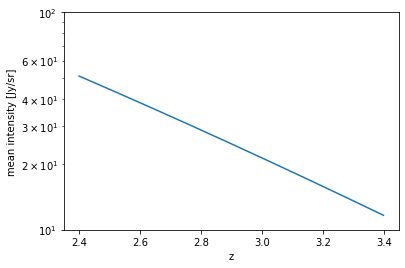

In [17]:
idx2 = np.where((zs > 2.4) & (zs < 3.4))[0]
plt.plot(zs[idx2], (L_COz * Hzbit_CO).to(u.Jy/u.sr)[idx2])

plt.ylabel('mean intensity [Jy/sr]')
plt.xlabel('z')
plt.yscale('log')
plt.ylim(1e1, 1e2)

# SPHEREx and HETDEX

In [18]:
zmin = 1.9
zmax = 9
idxs = np.where((zs < zmax) & (zs>zmin))[0]

In [19]:
#1412.4872
#2103.01971

In [20]:
R = 150
Omegapix = (6*u.arcsec)**2
Omegasurv = 2 * 100 * u.deg**2

In [21]:
chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))
(chimax - chimin) / ((1+zmax) * R * f_dz_dchi(zmax))

709.4022642392255

In [22]:
#also taken from Manu's code
# Inferred from SPHEREx science book
mAB5Sigma = 22 # 5sigma lim mag for point source (Cheng+18)
f5Sigma = 10.**((8.9-mAB5Sigma)/2.5) * u.Jy   # 5sigma lim point source flux [Jy]
sigmaFSource = f5Sigma / 5. # 1sigma lim point source flux [Jy]

# This point source flux is the output of a spatial matched filter
# for one frequency element.
# It needs to be converted to pixel flux.
# The SPHEREx doc, fig 9, gives the conversion using 
# the effective number of pixels covered by the PSF
nPixEff = 3.   # 2-5 in fig 9 of SPHEREx doc

sigmaFPixel = sigmaFSource / np.sqrt(nPixEff)
sigmaIPixel = sigmaFPixel / Omegapix 

# convert from pixel variance
# to white noise power spectrum
result = sigmaIPixel**2 * voxelComovingVolume(5, Omegapix, R=R)
result = result.to((u.Jy/u.sr)**2 * u.Mpc**3) * h**3 #[(Jy/sr)^2 Mpc/h^3]

In [23]:
print(sigmaIPixel.to(u.Jy/u.sr), '\n', Omegapix.to(u.sr)) #matches App B.1 2103.01971

785.266614525263 Jy / sr 
 8.461594994075239e-10 sr


Text(0.5, 1.0, 'Ly$\\alpha$')

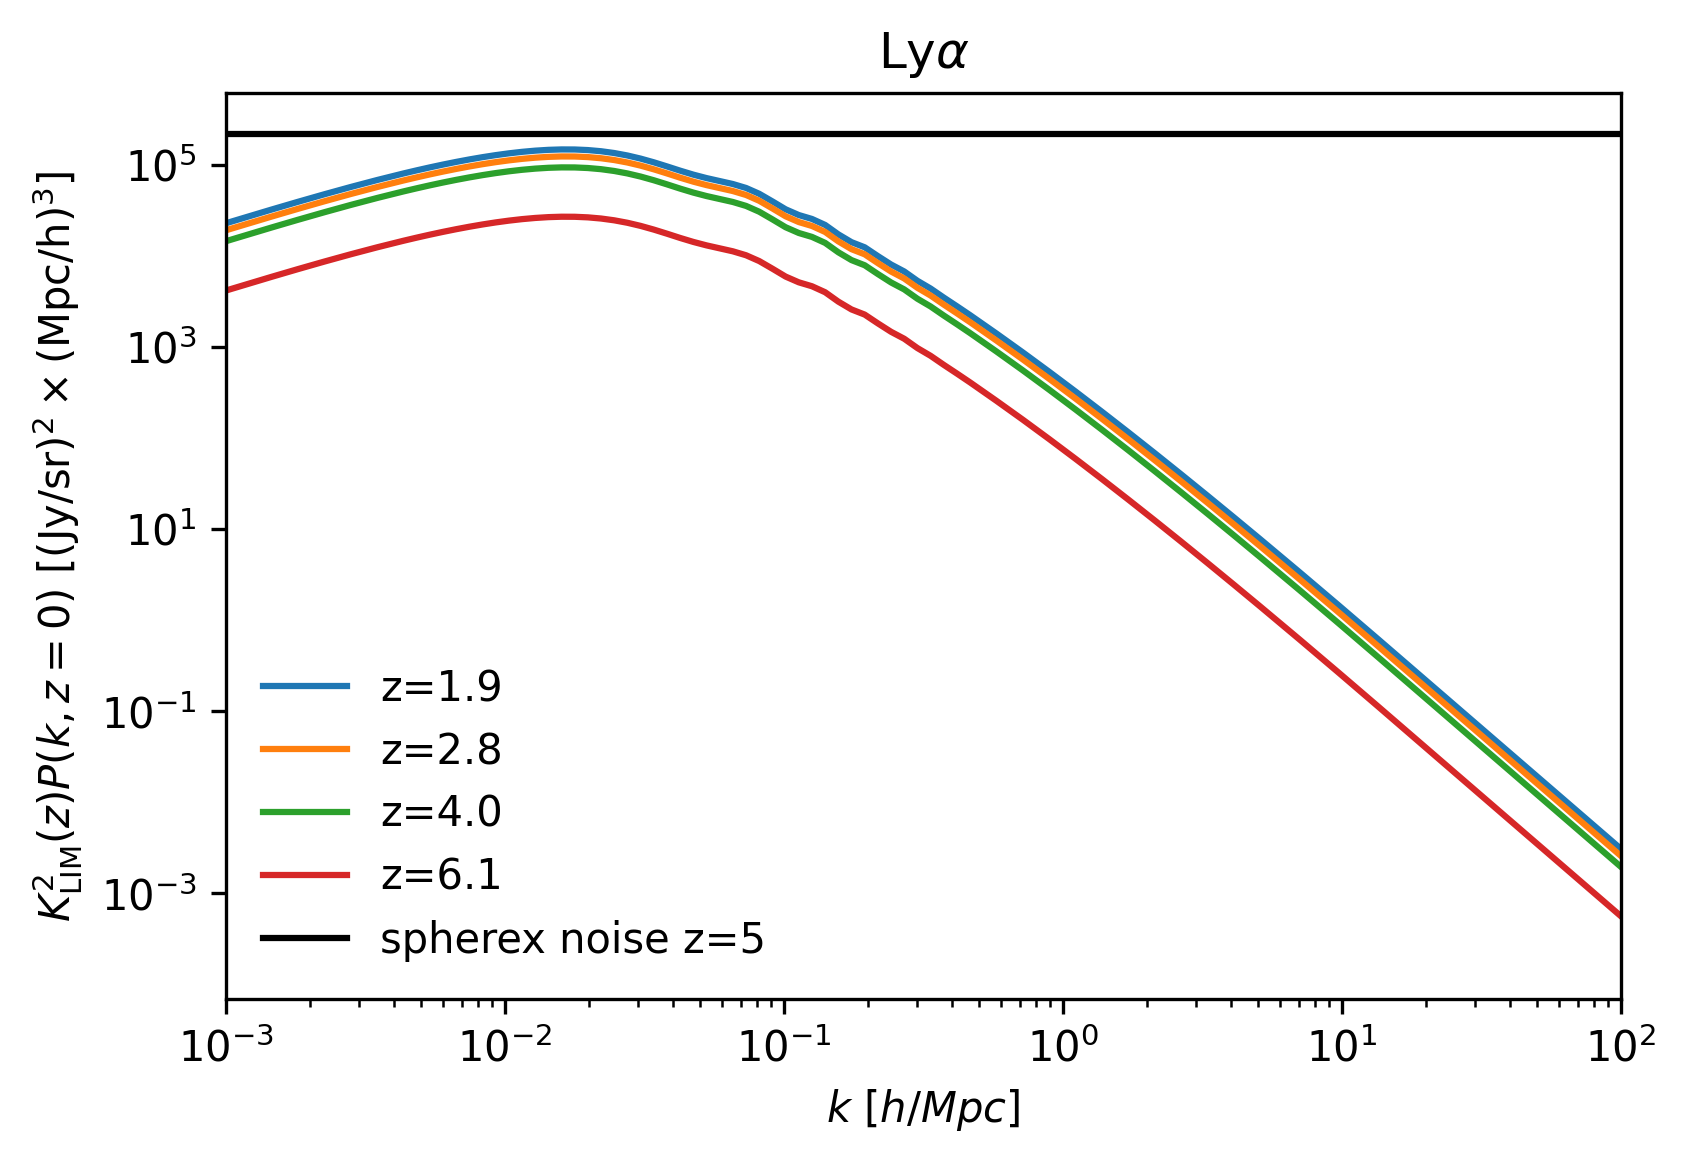

In [24]:
plt.figure(dpi = 300, facecolor='w')

for idx in idxs[::1000]:
    z = zs[idx]
    plt.plot(k/h, (KI_Lya[idx].to(u.Jy/u.sr))**2 * pk_lin * h **3, label='z=%.1f'%(z))
    
    
plt.axhline(np.array(result), c='k', label='spherex noise z=5')

plt.xlim(1e-3, 1e2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$k\ [h / Mpc]$', )
plt.ylabel(r'$K_{\rm LIM}^2(z)P(k, z=0)\ [{\rm (Jy/sr)^2\times (Mpc/h)}^3]$', )
plt.legend(frameon=False)
plt.title(r'Ly$\alpha$')

(0.0, 6.3)

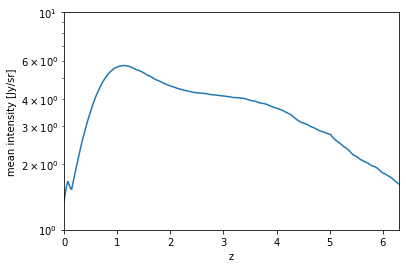

In [25]:
plt.plot(zs, (L_Lya_z * Hzbit_Lya).to(u.Jy/u.sr))

plt.ylabel('mean intensity [Jy/sr]')
plt.xlabel('z')
plt.yscale('log')
plt.ylim(1e0, 1e1)
plt.xlim(0, 6.3)

# CHIME

In [26]:
zmin = 1
zmax = 1.3
idxs = np.where((zs < zmax) & (zs>zmin))[0]

Text(0.5, 1.0, 'HI')

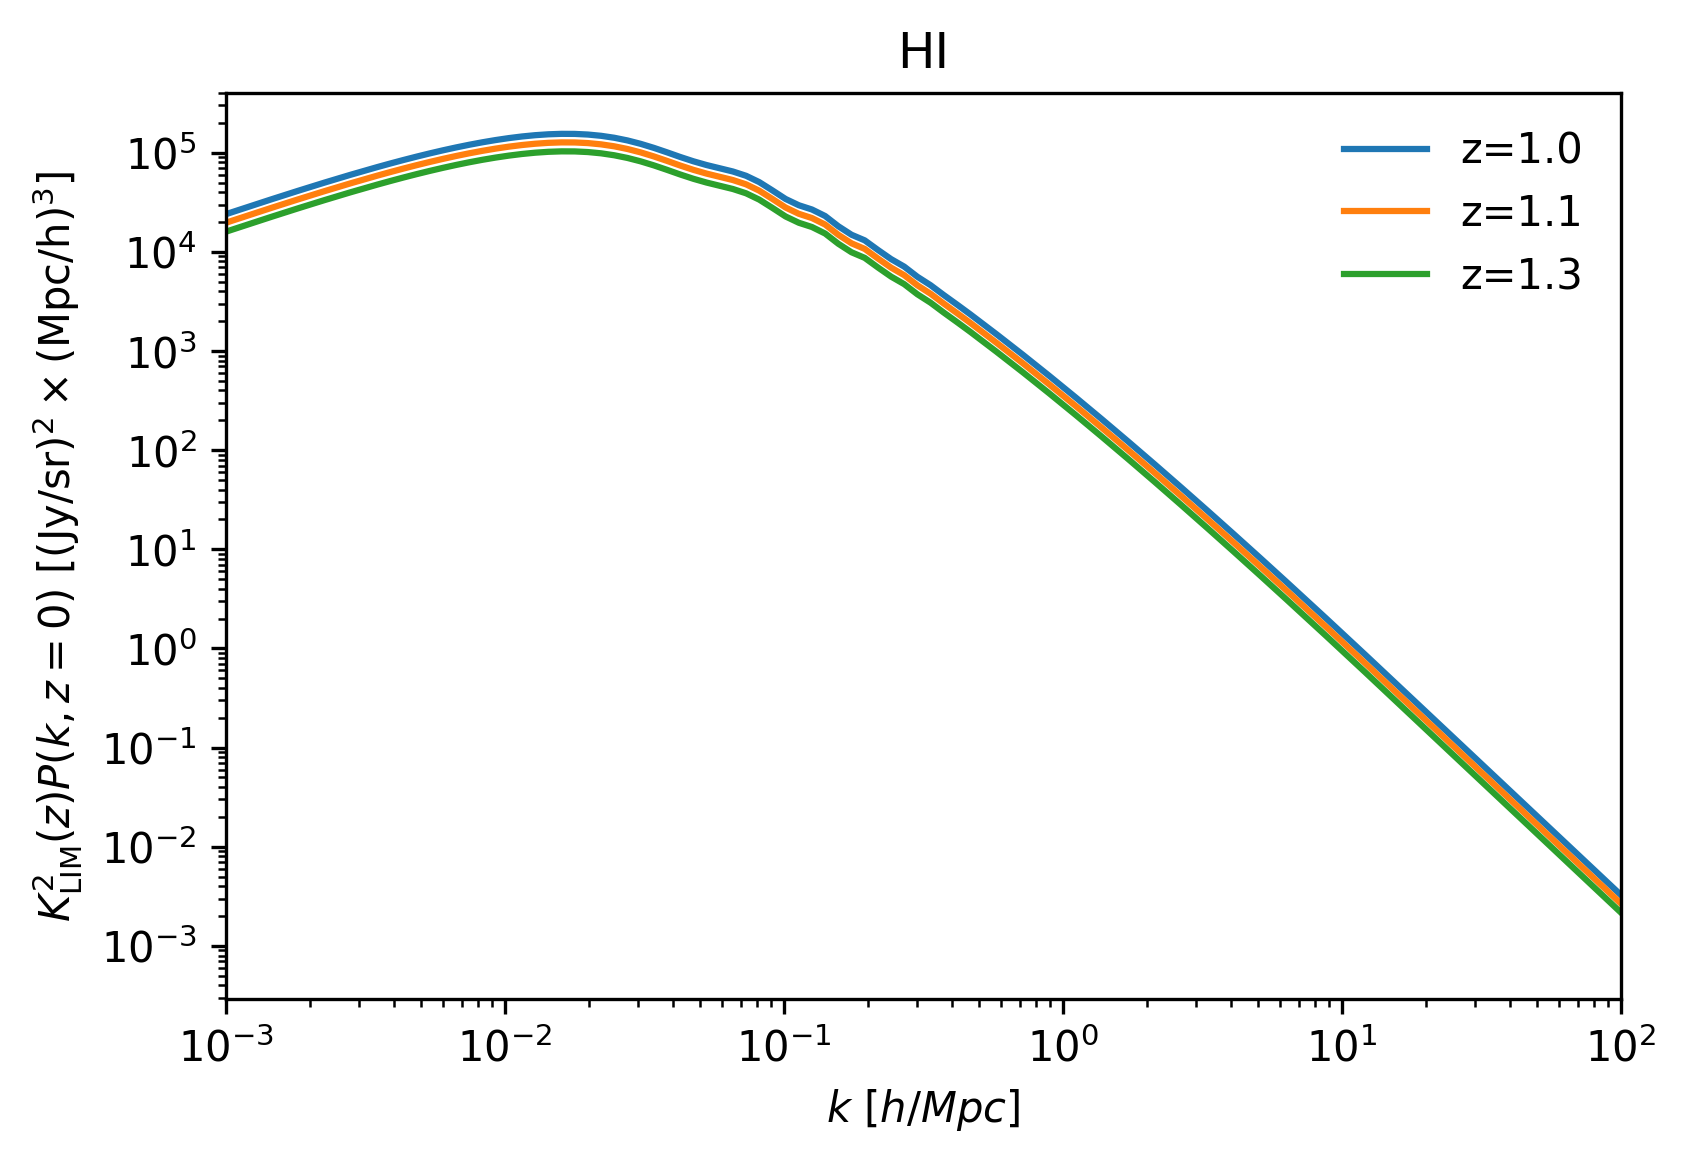

In [27]:
plt.figure(dpi = 300, facecolor='w')

for idx in idxs[::300]:
    z = zs[idx]
    plt.plot(k/h, (KI_HI[idx].to(u.Jy/u.sr))**2 * pk_lin * h **3, label='z=%.1f'%(z))
    
    

plt.xlim(1e-3, 1e2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$k\ [h / Mpc]$', )
plt.ylabel(r'$K_{\rm LIM}^2(z)P(k, z=0)\ [{\rm (Jy/sr)^2\times (Mpc/h)}^3]$', )
plt.legend(frameon=False)
plt.title('HI')

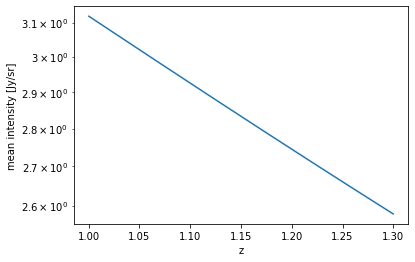

In [28]:
plt.plot(zs[idxs], (L_HI_z * Hzbit_HI).to(u.Jy/u.sr)[idxs])

plt.ylabel('mean intensity [Jy/sr]')
plt.xlabel('z')
plt.yscale('log')
# plt.ylim(1e0, 1e1)


# intensiteis

In [29]:
Lz

<Quantity [7.93932643e+04, 7.94670587e+04, 7.95407629e+04, ...,
           9.68307742e-47, 9.56864132e-47, 9.45536970e-47] solLum / Mpc3>

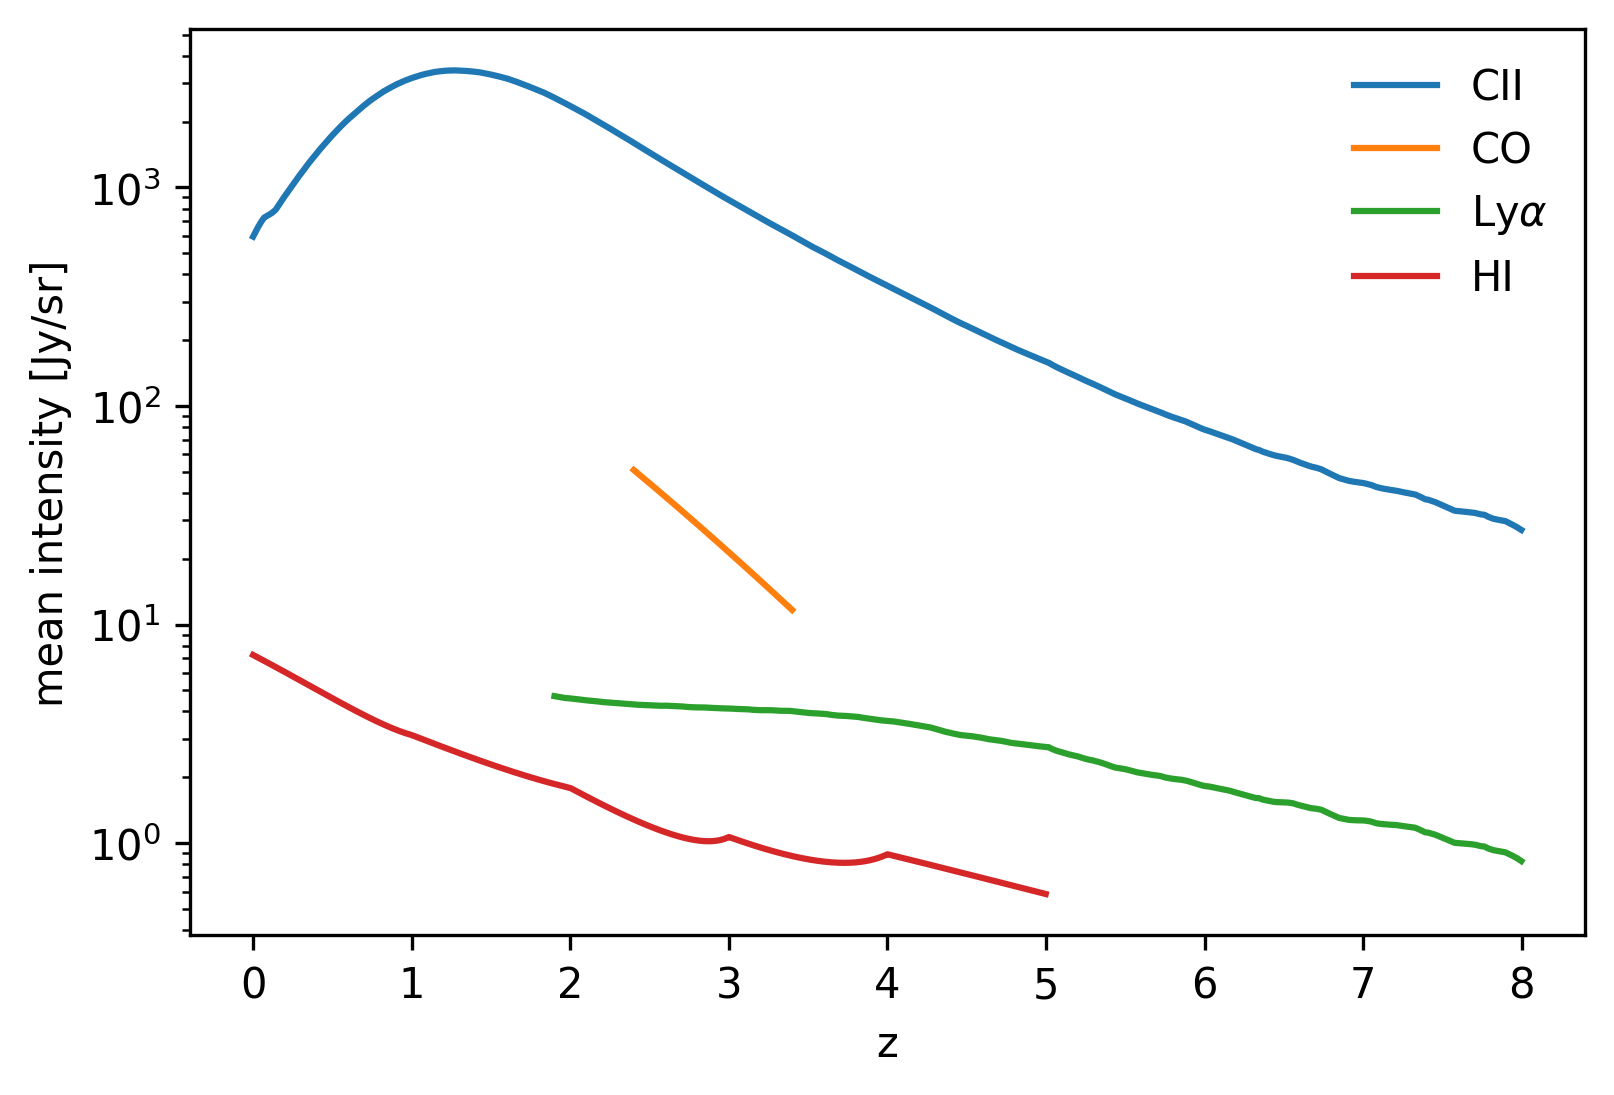

In [30]:
plt.figure(dpi = 300, facecolor='w')
plt.plot(zs[np.where(zs < 8)], 
         (Lz * Hzbit).to(u.Jy/u.sr)[np.where(zs < 8)], label='CII')
plt.plot(zs[np.where((zs > 2.4) & (zs < 3.4))], 
         (L_COz * Hzbit_CO).to(u.Jy/u.sr)[np.where((zs > 2.4) & (zs < 3.4))], label='CO')
plt.plot(zs[np.where((zs > 1.9) & (zs < 8))], 
         (L_Lya_z * Hzbit_Lya).to(u.Jy/u.sr)[np.where((zs > 1.9) & (zs < 8))], label=r'Ly$\alpha$')

plt.plot(zs[np.where(zs<5)], (L_HI_z * Hzbit_HI).to(u.Jy/u.sr)[np.where(zs<5)], label='HI')

plt.legend(frameon=False)


plt.ylabel(r'mean intensity [Jy/sr]')
plt.xlabel('z')
plt.yscale('log')

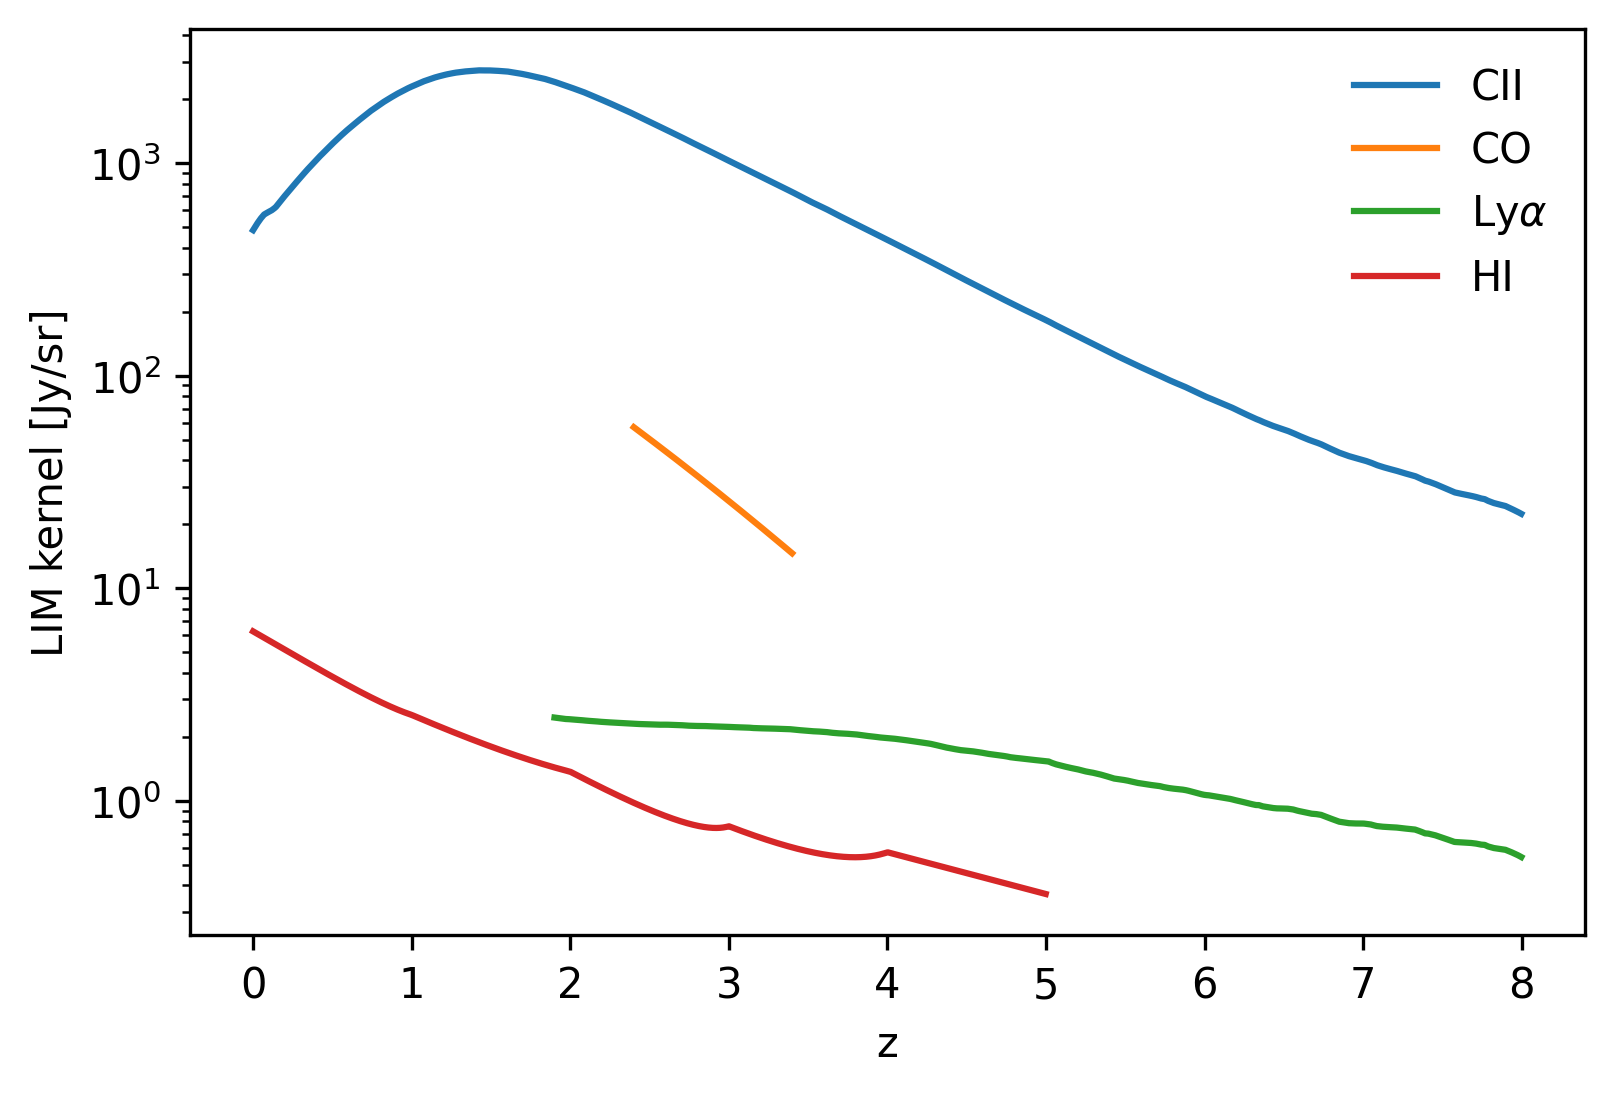

In [31]:
plt.figure(dpi = 300, facecolor='w')
plt.plot(zs[np.where(zs < 8)], 
         (KI).to(u.Jy/u.sr)[np.where(zs < 8)], label='CII')
plt.plot(zs[np.where((zs > 2.4) & (zs < 3.4))], 
         (KI_CO).to(u.Jy/u.sr)[np.where((zs > 2.4) & (zs < 3.4))], label='CO')
plt.plot(zs[np.where((zs > 1.9) & (zs < 8))], 
         (KI_Lya).to(u.Jy/u.sr)[np.where((zs > 1.9) & (zs < 8))], label=r'Ly$\alpha$')

plt.plot(zs[np.where(zs<5)], 
         (KI_HI).to(u.Jy/u.sr)[np.where(zs<5)], label='HI')

plt.legend(frameon=False)


plt.ylabel(r'LIM kernel [Jy/sr]')
plt.xlabel('z')
plt.yscale('log')